<a href="https://colab.research.google.com/github/nadhifahlutfiyah/PCVK_GENAP_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content.drive')

Mounted at /content.drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# **PRAKTIKUM**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


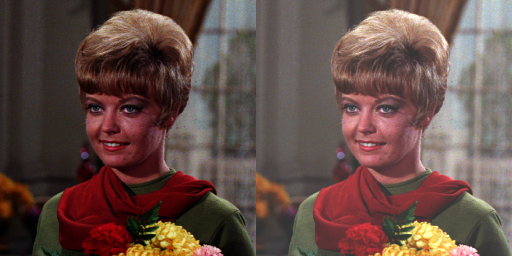

In [5]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print("Error, not a number")

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c]+brightness, 0, 255)

#cara simpel tanpa for loop
#brightness_image = cv.convertScale(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **TUGAS**

**1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori,**

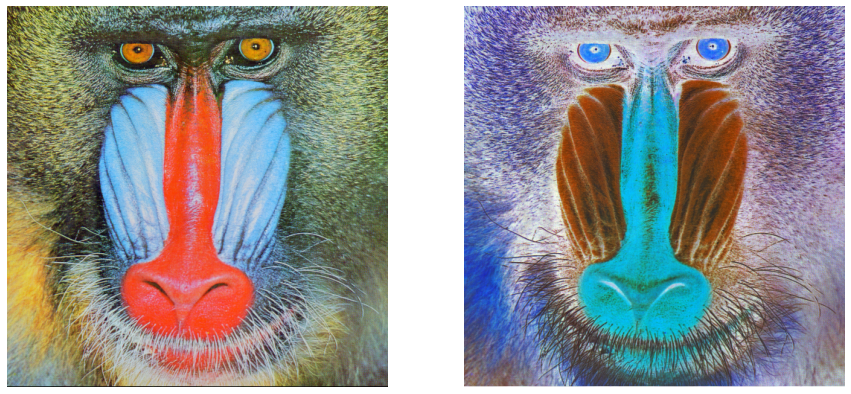

In [4]:
fig = plt.figure(figsize=(15,15))
img = plt.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
array_img = np.array(img)

#invers citra
inverse_img = 255 - array_img

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(inverse_img)
plt.axis('off')

plt.show()

**2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras,**

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [(-255) - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


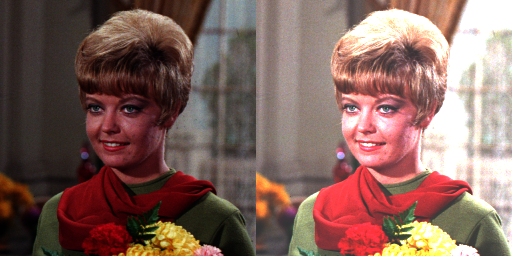

In [6]:
print('Mengubah kontras dan tingkat kecerahan citra')  
print('--------------------------------------------')

try :
  brightness = int(input('Masukkan tingkat kecerahan [(-255) - 255]: '))  
  contras = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original2 = original
bc_image = np.zeros(original2.shape, original2.dtype)

#akses per piksel
for y in range(original2.shape[0]):
  for x in range(original2.shape[1]):
    for c in range(original2.shape[2]):
      bc_image[y,x,c] = np.clip(contras * original2[y,x,c] + brightness, 0, 255)

final_frame2 = cv.hconcat((original2, bc_image))
cv2_imshow(final_frame2) 

**3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log,**

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


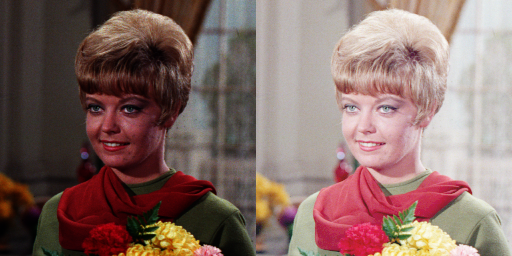

In [7]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

try :
  brightness3 = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original3 = original

c = 255/(np.log(1 + np.max(original3)))
log_transformed = c * np.log(1 + original3)

log_transformed = np.array(log_transformed, dtype = np.uint8)

final_frame3 = cv.hconcat((original3, log_transformed))
cv2_imshow(final_frame3)

**4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori,**

a. Averaging

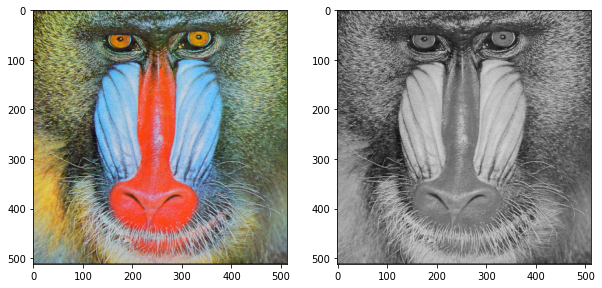

In [8]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

av_grey = imgRGB.copy()
av_grey[:] = np.sum(av_grey,axis=-1,keepdims=1)/3

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(imgRGB)
fig.add_subplot(1, 2, 2)
plt.imshow(av_grey)

b. Lightness

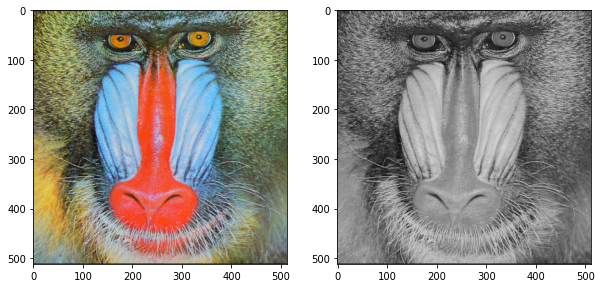

In [9]:
light_gray = imgRGB.copy()
light_gray[:] = np.max(light_gray,axis=-1,keepdims=1)/2 + np.min(light_gray,axis=-1,keepdims=1)/2

fig2 = plt.figure(figsize=(10, 7))
fig2.add_subplot(1, 2, 1)
plt.imshow(imgRGB)
fig2.add_subplot(1, 2, 2)
plt.imshow(light_gray)

c. Luminance

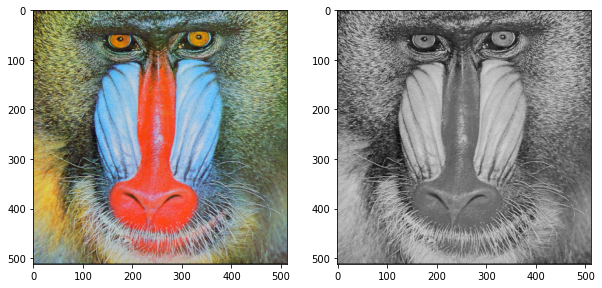

In [10]:
lg_img = imgRGB.copy()
luminosity_constant = [0.21,0.72,0.07]

L_mean = np.tensordot(lg_img,luminosity_constant, axes=((-1,-1)))[...,None]
lg_img[:] = L_mean.astype(lg_img.dtype)

fig2 = plt.figure(figsize=(10, 7))
fig2.add_subplot(1, 2, 1)
plt.imshow(imgRGB)
fig2.add_subplot(1, 2, 2)
plt.imshow(lg_img)

**5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale**

NameError: ignored

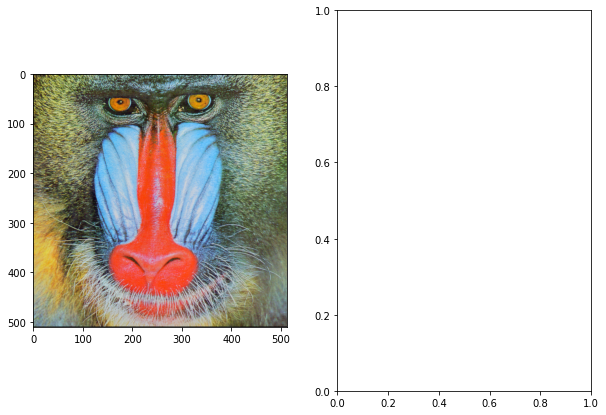

In [11]:
r_img = imgRGB.copy()
blue, mask = cv.threshold(r_img[:, :,2], 210, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(r_img)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

gray = cv.cvtColor(r_img, cv.COLOR_RGB2GRAY)
r_img  = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

fig2 = plt.figure(figsize=(10, 7))
fig2.add_subplot(1, 2, 1)
plt.imshow(imgRGB)
fig2.add_subplot(1, 2, 2)
plt.imshow(out)